# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aulia Putri Fanani
- **Email:** liapuutri2007@gmail.com
- **ID Dicoding:** MC006D5X1464

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu (temp) terhadap jumlah peminjaman sepeda (cnt)?
- Apakah kecepatan angin (windspeed) yang tinggi berpengaruh terhadap  jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [31]:
# Mengumpulkan dan memuat dataset csv
day_df = pd.read_csv("/content/day.csv")
hour_df = pd.read_csv("/content/hour.csv")

In [32]:
# Menampilkan 5 baris pertama pada data frame day_dataset dan hour_dataset
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [33]:
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Dilakukan untuk memuat dan mendefinisikan dataset yang akan digunakan
- Mencoba menampilkan data 5 teratas pada dataset yang akan digunakan

### Assessing Data
Menilai data pada dataset dan melihat permasalahan data yang ada pada dataset

In [34]:
# Memeriksa tipe data dataset
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [35]:
# Memeriksa apakah terdapat missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [36]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [37]:
print("Jumlah duplikasi area 1: ", day_df.duplicated().sum())
print("Jumlah duplikasi area 2: ", hour_df.duplicated().sum())

Jumlah duplikasi area 1:  0
Jumlah duplikasi area 2:  0


In [38]:
# Menampilkan ringkasan parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [39]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan beberapa missing value
- Tidak ditemukan duplikasi data
- Dari hasil describe() dalam beberapa kolom kategorikal masing masing mempunyai nilai rentang yang sesuai
- dteday belum bertipe data date time

### Cleaning Data

In [40]:
# Mendrop duplikasi data
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

In [41]:
print("Jumlah duplikasi day_df : ", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df : ", hour_df.duplicated().sum())

Jumlah duplikasi day_df :  0
Jumlah duplikasi hour_df :  0


In [42]:
print("\nMissing Values day_df :\n", day_df.isna().sum())
print("\nMissing Values hour_df :\n", hour_df.isna().sum())


Missing Values day_df :
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values hour_df :
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [43]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [75]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [44]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [76]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Memastikan tidak adanya missing value
- Memastikan tidak adanya duplikasi data
- Mengubah tipe data dteday yang awalanya object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [45]:
# Melihat rangkuman parameter statistik dari dataset
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [55]:
# Melihat korelasi antara suhu dan jumlah peminjaman sepeda per jam untuk pertanyaan pertama
day_df[['temp','atemp', 'cnt']].corr()

,temp,atemp,cnt
temp,1.000000,0.991702,0.627494
atemp,0.991702,1.000000,0.631066
cnt,0.627494,0.631066,1.000000


In [47]:
# Melihat korelasi antara suhu dan jumlah peminjaman sepeda per hari untuk pertanyaan pertama
hour_df[['temp','atemp', 'cnt']].corr()

,temp,atemp,cnt
temp,1.000000,0.987672,0.404772
atemp,0.987672,1.000000,0.400929
cnt,0.404772,0.400929,1.000000


In [48]:
# Melihat korelasi antara kecepatan angin (windspeed) yang tinggi terhadap jumlah peminjaman sepeda tiap jamnnya

In [86]:
day_df[['windspeed', 'cnt']].corr()

,windspeed,cnt
windspeed,1.000000,-0.234545
cnt,-0.234545,1.000000


In [87]:
hour_df[['windspeed', 'cnt']].corr()

,windspeed,cnt
windspeed,1.000000,0.093234
cnt,0.093234,1.000000


In [73]:
# Membuat pivot tabel
day_df.groupby(["windspeed"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

,cnt,casual,registered
windspeed,,,
0.022392,4985,949,4036
0.042304,5117,1514,3603
0.045404,5409,2235,3174
0.045408,1712,120,1592
0.046650,5087,337,4750
...,...,...,...
0.417908,1913,208,1705
0.421642,2732,317,2415
0.422275,4195,471,3724


In [71]:
day_df.groupby(["temp"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).sort_index(ascending=True)

,cnt,casual,registered
temp,,,
0.059130,981,93,888
0.096522,986,150,836
0.097391,1416,86,1330
0.107500,2368,95,2273
0.127500,1529,73,1456
...,...,...,...
0.834167,5463,829,4634
0.838333,3846,670,3176
0.848333,3387,562,2825


In [77]:
# Melihat gabuangan dari hour_df dan day_df
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    on="dteday"
)

all_df.head()

,dteday,instant_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,2011-01-01,1,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [85]:
all_df.groupby(by="windspeed_x").agg({
    "cnt_x" : "sum",
    "cnt_y" : "sum",
    "casual_x" : "sum",
    "casual_y" : "sum",
    "registered_x" : "sum",
    "registered_y" : "sum",
})

,cnt_x,cnt_y,casual_x,casual_y,registered_x,registered_y
windspeed_x,,,,,,
0.022392,119640,4985,22776,949,96864,4036
0.042304,122808,5117,36336,1514,86472,3603
0.045404,129816,5409,53640,2235,76176,3174
0.045408,41088,1712,2880,120,38208,1592
0.046650,122088,5087,8088,337,114000,4750
...,...,...,...,...,...,...
0.417908,45912,1913,4992,208,40920,1705
0.421642,65568,2732,7608,317,57960,2415
0.422275,100680,4195,11304,471,89376,3724


In [90]:
all_df.groupby(by="temp_x").agg({
    "cnt_x" : "sum",
    "cnt_y" : "sum",
    "casual_x" : "sum",
    "casual_y" : "sum",
    "registered_x" : "sum",
    "registered_y" : "sum",
}).sort_index(ascending=True)

,cnt_x,cnt_y,casual_x,casual_y,registered_x,registered_y
temp_x,,,,,,
0.059130,22563,981,2139,93,20424,888
0.096522,22678,986,3450,150,19228,836
0.097391,32568,1416,1978,86,30590,1330
0.107500,56832,2368,2280,95,54552,2273
0.127500,36696,1529,1752,73,34944,1456
...,...,...,...,...,...,...
0.834167,131112,5463,19896,829,111216,4634
0.838333,92304,3846,16080,670,76224,3176
0.848333,81288,3387,13488,562,67800,2825


**Insight:**
- Menggunakan comman corr() atau korelasi yang digunakan untuk mengukur seberapa besar pengaruh antara dan suhu (tempt) dengan jumlah total peminjaman baik peminjam casual dan register. Terlihat derjat korelasi antara suhu dengan jumlah penyewa sepeda yang cukup positif. Sehingga mendapatkan asumsi bahwa semakin hangat cuaca, semakin banyak orang yang menyewa sepeda pada beberapa waktu namun tidak terbilang stabil
- Menggunakan comman corr() atau korelasi yang digunakan untuk mengukur seberapa besar pengaruh antara kecepatan angin (windspeed) dengan jumlah  total peminjaman baik peminjam casual dan register. Terlihat derajat korelasi antara kecepatan angin hari itu dengan jumlah peminjam sepeda yang memiliki korelasi negatif atau hampir netral. Sehingga mendapat asumsi bahwa banyak orang tidak terlalu peduli kondisi kecepatan angin saat ingin bersepeda pada titik tertentu
- Kedua asumsi diatas selaras juga ditampilkan pada pembuatan tabel pivot menggunakan gruop by yang mendukung hasil diatas.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh suhu (temp & atemp) terhadap jumlah peminjaman sepeda keseluruhan (cnt)?

In [51]:
print(day_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [93]:
# Melakukan resampling data untuk menghitung rata-rata suhu serta total peminjaman dalam satu bulan
month_corr = day_df.resample(rule='ME').agg({
    "temp": "mean",
    "atemp": "mean",
    "cnt": "sum"
})
print("Korelasi Antar Variabel per Bulan:\n", month_corr.corr())


Korelasi Antar Variabel per Bulan:
            temp     atemp       cnt
temp   1.000000  0.999177  0.722683
atemp  0.999177  1.000000  0.728208
cnt    0.722683  0.728208  1.000000


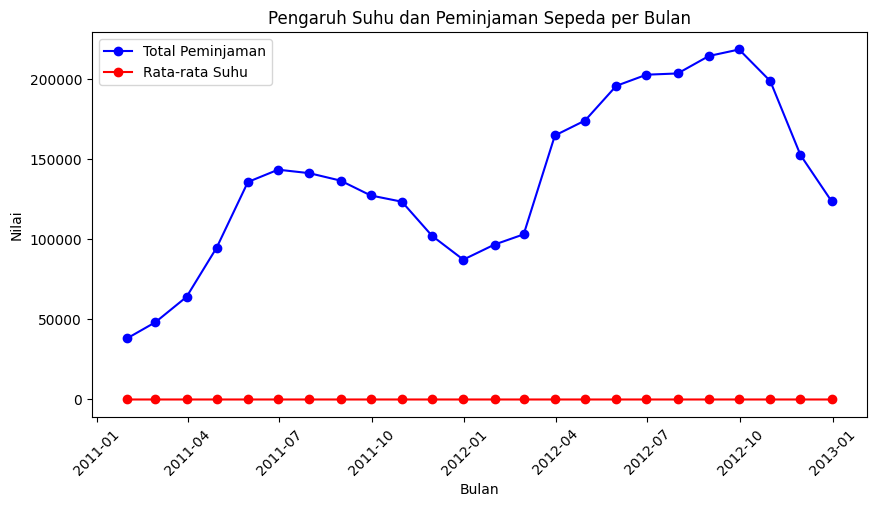

'Karena perubahan nilai perubahan suhu yang mempunyai skala yang jauh dengan peminjaman sepeda maka diperlukan \npenyesuaian skala agar terlihat perubahan dan dampaknya yang selaras dengan perubahan jumlah peminjam sepeda '

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(month_corr.index,
         month_corr["cnt"],
         marker="o",
         color="b",
         label="Total Peminjaman")

plt.plot(month_corr.index,
         month_corr["temp"],
         marker="o",
         color="r",
         label="Rata-rata Suhu")

plt.title("Pengaruh Suhu dan Peminjaman Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.legend()


plt.show()
'''Karena perubahan nilai perubahan suhu yang mempunyai skala yang jauh dengan peminjaman sepeda maka diperlukan
penyesuaian skala agar terlihat perubahan dan dampaknya yang selaras dengan perubahan jumlah peminjam sepeda '''

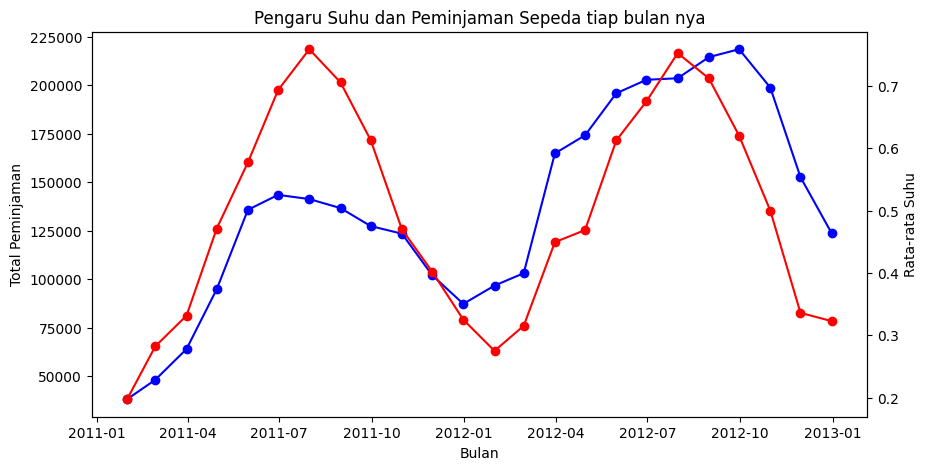

In [100]:
# Setelah disesuaikan
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Bulan")
ax1.set_ylabel("Total Peminjaman")
ax1.plot(month_corr.index,
         month_corr["cnt"],
         marker="o",
         color="b",
         label="Total Peminjaman")


ax2 = ax1.twinx()
ax2.set_ylabel("Rata-rata Suhu")
ax2.plot(month_corr.index,
         month_corr["temp"],
         marker="o",
         color="r",
         label="Rata-rata Suhu")

plt.title("Pengaruh Suhu dan Peminjaman Sepeda tiap bulan nya")
plt.show()

### Pertanyaan 2: Apakah kecepatan angin (windspeed) yang tinggi berpengaruh terhadap  jumlah peminjaman sepeda?

In [101]:
# Melakukan resampling data untuk menghitung rata-rata kecepatan angin serta total peminjaman dalam satu bulan
month_corr = day_df.resample(rule='ME').agg({
    "windspeed": "mean",
    "atemp": "mean",
    "cnt": "sum"
})
print("Korelasi Antar Variabel per Bulan:\n", month_corr.corr())


Korelasi Antar Variabel per Bulan:
            windspeed     atemp       cnt
windspeed   1.000000 -0.513392 -0.463279
atemp      -0.513392  1.000000  0.728208
cnt        -0.463279  0.728208  1.000000


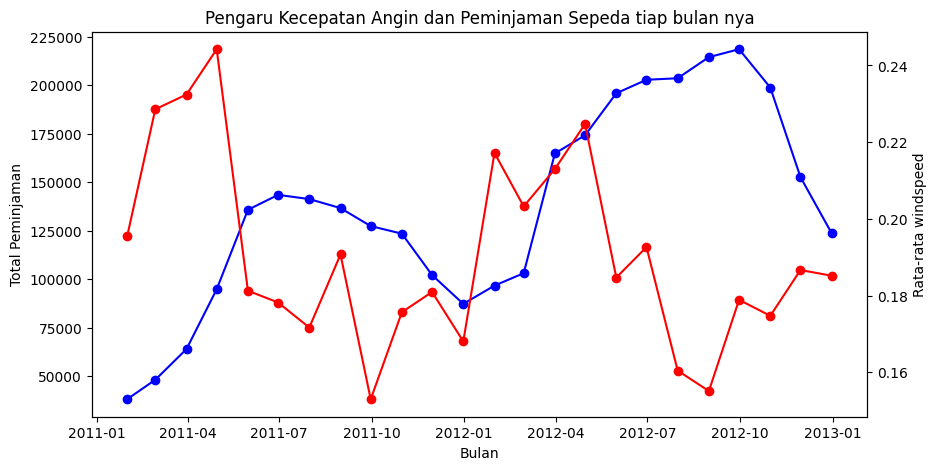

In [102]:
# Setelah disesuaikan
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Bulan")
ax1.set_ylabel("Total Peminjaman")
ax1.plot(month_corr.index,
         month_corr["cnt"],
         marker="o",
         color="b",
         label="Total Peminjaman")


ax2 = ax1.twinx()
ax2.set_ylabel("Rata-rata windspeed")
ax2.plot(month_corr.index,
         month_corr["windspeed"],
         marker="o",
         color="r",
         label="Rata-rata windspeed")

plt.title("Pengaru Kecepatan Angin dan Peminjaman Sepeda tiap bulan nya")
plt.show()

In [103]:
all_df.to_csv("all_data.csv", index=False)

**Insight:**
- Terlihat berdasarkan grafik dan analisis exploratory data diatas bahwa pada pertanyaan pertama terlihat bahwa suhu dapat turut memengaruhi jumlah peminjaman sepeda. Dikarenakan perbedaan skala yang begitu jauh, visualisasi data dibantu menggunakan twinx yang memungkinkan kita untuk dapat melihat plot data dengan 2 skala y yang berbeda sehingga memudahkan melihat pengaruhnya
- Begitu juga dengan pertanyaan kedua, terlihat hampir tidak ada pengaruh antara kecepatan angin dengan jumlah peminjaman sepeda sehingga tidak terlihat adanya adanya relasi pada 2 plot data pada visualisasi data diatas

## Analisis Lanjutan (Opsional)

## Conclusion

- Sehingga berdasarkan analisis data diatas dapat ditemukan bahwa ternyata kondisi suhu pada kondisi tertentu juga turut memengaruhi jumlah peminjaman sepeda. Sehingga semakin hangat cuaca maka akan semakin banyak orang yang berminat untuk meminjam sepeda
- Berdasarkan hasi analisis data diatas juga dapat ditemukan bahwa ternyata kondisi kecepatan angin tidak turut memengaruhi jumlah peminjam sepeda. Sehingga semakin cepat atau lambat kecepatan angin tidak sepenuhnya turut memengaruhi keinginan orang untuk meminjam sepeda.